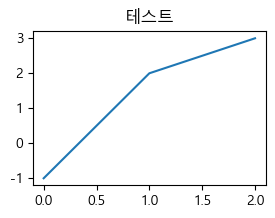

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))
pass


### 데이터프레임 생성

In [26]:
# --------------------
# 기상데이터 전체 데이터프레임
#   df_all
# --------------------

file_path = 'data/기상데이터/기상데이터_전체.csv'
df_all = pd.read_csv(file_path)
df_all.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),1시간 최다강수량(mm),일강수량(mm),연도,월
0,108,서울,1907-10-01,13.5,7.9,20.7,NaN,NaN,1907,10
1,108,서울,1907-10-02,16.2,7.9,22.0,NaN,0.2,1907,10
2,108,서울,1907-10-03,16.2,13.1,21.3,NaN,2.4,1907,10
3,108,서울,1907-10-04,16.5,11.2,22.0,NaN,NaN,1907,10
4,108,서울,1907-10-05,17.6,10.9,25.4,NaN,NaN,1907,10


In [27]:
# --------------------
# 지점정보 데이터프레임
#   df_location
# --------------------

file_path = 'data/기상데이터/기상데이터_지점정보.csv'
df_location = pd.read_csv(file_path)
df_location.head()

,지점,지점명,데이터수,시작년도,끝년도
0,90,속초,20910,1968,2025
1,93,북춘천,3104,2016,2025
2,95,철원,13605,1988,2025
3,98,동두천,9952,1998,2025
4,99,파주,8490,2002,2025


### 데이터 선택
* 행 : 지점을 입력받아 해당 지점의 데이터만 선택한다.
* 열 : 기온분석을 위한 컬럼만 선택한다.

In [28]:
# --------------------
# 지점 입력받기
#   location_name
# --------------------
location_name = input('지점명을 입력하세요:')

# --------------------
# 입력받은 지점의 정보 확인
# --------------------
cond = df_location['지점명']==location_name
df_location.loc[cond]

,지점,지점명,데이터수,시작년도,끝년도
11,108,서울,41936,1907,2025


In [29]:
# -----------------------------------------
# 전체 데이터에서 입력받은 지점의 데이터만 선택
# 선택할 컬럼 : ['지점','지점명','연도','일시', '평균기온(°C)','최저기온(°C)','최고기온(°C)']
#   df_target
# -----------------------------------------

cond = df_all['지점명'] == location_name
cols = ['지점','지점명','연도','일시', '평균기온(°C)','최저기온(°C)','최고기온(°C)']
df_target = df_all.loc[cond, cols]
df_target

,지점,지점명,연도,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,1907,1907-10-01,13.5,7.9,20.7
1,108,서울,1907,1907-10-02,16.2,7.9,22.0
2,108,서울,1907,1907-10-03,16.2,13.1,21.3
3,108,서울,1907,1907-10-04,16.5,11.2,22.0
4,108,서울,1907,1907-10-05,17.6,10.9,25.4
...,...,...,...,...,...,...,...
1595966,108,서울,2025,2025-03-27,13.7,7.1,18.6
1595967,108,서울,2025,2025-03-28,6.5,3.1,11.8
1595968,108,서울,2025,2025-03-29,3.3,0.6,6.7
1595969,108,서울,2025,2025-03-30,3.3,-1.8,7.6


In [30]:
# -----------------------------------------
# 연도별 데이터 개수 확인
#   year_count
# -----------------------------------------
year_count = df_target['연도'].value_counts()
year_count.tail(10)

연도
2011    365
2010    365
2023    365
2022    365
1950    257
1953    125
1907     92
1952     91
2025     90
1951      7
Name: count, dtype: int64

In [31]:
# -----------------------------------------
# 데이터가 350개 이상인 연도 목록
#   year_select
# -----------------------------------------
cond = year_count>=350
year_select = year_count[cond].index
year_select

Index([1908, 1912, 1916, 1924, 1928, 1920, 1932, 1940, 1948, 1960,
       ...
       2017, 2015, 2019, 2018, 2021, 2014, 2011, 2010, 2023, 2022],
      dtype='int64', name='연도', length=113)

In [32]:
# -----------------------------------------
# 데이터의 갯수가 350개 이상인 연도에 해당되는 데이터만 선택
#   df_target
# -----------------------------------------

cond = df_target['연도'].isin(year_select)
df_target = df_target.loc[cond]
df_target

,지점,지점명,연도,일시,평균기온(°C),최저기온(°C),최고기온(°C)
92,108,서울,1908,1908-01-01,-5.9,-9.1,-1.3
93,108,서울,1908,1908-01-02,-7.7,-13.9,-3.0
94,108,서울,1908,1908-01-03,-6.2,-10.8,-2.9
95,108,서울,1908,1908-01-04,-7.5,-12.8,-1.7
96,108,서울,1908,1908-01-05,-4.8,-11.3,-0.1
...,...,...,...,...,...,...,...
1595876,108,서울,2024,2024-12-27,-2.6,-5.9,1.8
1595877,108,서울,2024,2024-12-28,-3.0,-6.7,1.1
1595878,108,서울,2024,2024-12-29,1.1,-4.2,6.1
1595879,108,서울,2024,2024-12-30,5.5,1.9,10.1


In [33]:
# -----------------------------------------
# 연도별 데이터 개수 다시 확인
# -----------------------------------------
df_target['연도'].value_counts()


연도
1908    366
1912    366
1916    366
1924    366
1920    366
       ... 
2017    365
2019    365
2021    365
2022    365
2023    365
Name: count, Length: 113, dtype: int64

### 결측치 분석 및 처리

In [34]:
# -----------------------------------------
# 결측치 확인
# -----------------------------------------

df_target.isnull().sum()

지점          0
지점명         0
연도          0
일시          0
평균기온(°C)    0
최저기온(°C)    3
최고기온(°C)    3
dtype: int64

In [35]:
# -----------------------------------------
# 결측치 확인
# -----------------------------------------

cond1 = df_target['평균기온(°C)'].isnull()
cond2 = df_target['최저기온(°C)'].isnull()
cond3 = df_target['최고기온(°C)'].isnull()
df_target.loc[cond1 | cond2 | cond3]

,지점,지점명,연도,일시,평균기온(°C),최저기온(°C),최고기온(°C)
185194,108,서울,1967,1967-02-19,-1.7,NaN,NaN
254931,108,서울,1973,1973-10-16,12.3,NaN,NaN
1273508,108,서울,2017,2017-10-12,11.4,8.8,NaN
1595004,108,서울,2022,2022-08-08,26.8,NaN,28.4


In [36]:
# -----------------------------------------
# 결측치를 이전 데이터로 채우기
# -----------------------------------------
df_target = df_target.ffill() # forward fill

# -----------------------------------------
# 결측치를 다음 데이터로 채우기
# -----------------------------------------
df_target = df_target.bfill() # backward fill

In [37]:
# -----------------------------------------
# 결측치 다시 확인
# -----------------------------------------

df_target.isnull().sum()

지점          0
지점명         0
연도          0
일시          0
평균기온(°C)    0
최저기온(°C)    0
최고기온(°C)    0
dtype: int64

### 연도별 연 평균기온 분석

In [49]:
# ----------------------------
# 연도별 연 평균기온 요약
# ----------------------------
df_year_mean = df_target.iloc[:, [2,4,5,6]].groupby('연도').mean()
df_year_mean

,평균기온(°C),최저기온(°C),최고기온(°C)
연도,,,
1908,10.427322,5.799727,15.771858
1909,10.608767,5.832603,16.011507
1910,10.412055,5.752603,16.008767
1911,10.654795,6.035616,16.001644
1912,10.123770,5.086885,15.646995
...,...,...,...
2020,13.271858,9.389617,17.867213
2021,13.752055,9.622466,18.491781
2022,13.296164,9.256438,18.077808


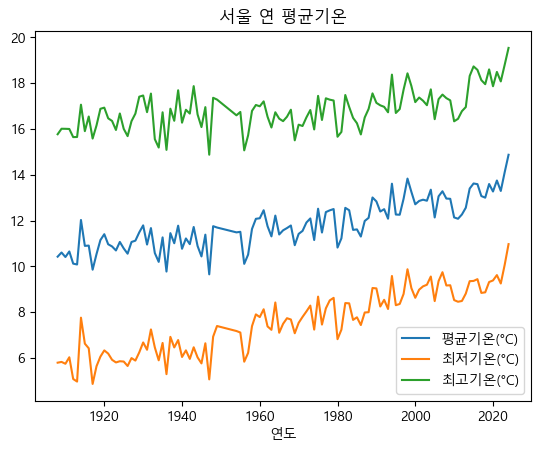

In [50]:
# ----------------------------
# 연도별 연 평균기온
# ---------------------------- 

df_year_mean.plot(title=f'{location_name} 연 평균기온');